In [23]:
#libraries
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

In [24]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

In [30]:
Ud = np.linspace(0.01, 10, 100)
human_popsize = 5000
sd = 0.0025

In [31]:
def get_stddev_multiplier_expected_best_individual(PopulationSize):
  """
  Generates the expected number of standard deviation apart from the mean where the best individual is found.
  This function assumes that the distribution of individuals is Gaussian.
  The best individual then follows a Gumbel distribution with location parameter equal to mu = F^(-1) (1-1/n) 
  and scale parmeter equal to sigma = F-1(1-1/(ne)) - mu (Extreme Value Distributions (Kotz and Nadarajah, 2000, p. 9); https://blogs.sas.com/content/iml/2019/07/22/extreme-value-normal-data.html (Rick Wicklin 2019)). 
  The expectation of this function is mu + gamma*sigma where gamma is the Euler-Mascheroni constant.
  This expectation is the number of standard deviations away from the mean that the best individual is at
  """

  # Calculate the quantile for a given probability
  mu = st.norm.ppf(1.0 - 1.0/PopulationSize)
  sigma = st.norm.ppf((1.0 - np.exp(-1.0)/PopulationSize)) - mu
  gamma = 0.5772157 #Euler-Mascheroni constant
  mean = mu + gamma*sigma

  return mean

def get_selective_deaths(Ud, sd, PopulationSize):
  """
  Get the fraction of selective deaths assuming that individuals follow a normal distribution with mean and variance Ud/sd.
  Mutation load (selective deaths) follow from Galeota-Sprung et al. 2020
  """
  stddev_away = get_stddev_multiplier_expected_best_individual(PopulationSize)
  selective_deaths = 1.0 - np.exp(-stddev_away*np.sqrt(Ud*np.abs(sd)))
  return selective_deaths

vget_selective_deaths = np.vectorize(get_selective_deaths)


In [32]:
sel_deaths = vget_selective_deaths(Ud, sd, human_popsize)
seldeath_Ne = 1-sel_deaths
unlinked_Ne = np.exp(-8*Ud*sd)

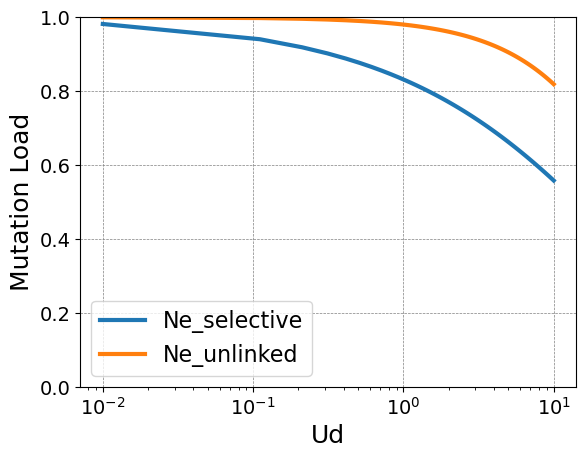

In [33]:
#x_locator = FixedLocator([0.005, 0.01, 0.02, 0.05, 0.1])
#x_formatter = FixedFormatter(["0.005", "0.01", "0.02", "0.05", "0.1"])

fig = plt.figure()
ax = fig.gca()
ax.plot(Ud, seldeath_Ne, label='Ne_selective')
ax.plot(Ud, unlinked_Ne, label='Ne_unlinked')
ax.set_xscale('log')
ax.set_xlabel('Ud')
ax.set_ylabel('Mutation Load')
ax.set_ylim(0, 1)
plt.legend()
plt.grid()
#ax.xaxis.set_major_formatter(x_formatter)
#ax.xaxis.set_major_locator(x_locator)
#fig.savefig('graphs/Selective_deaths_multfitness_gaussianapprox.png', bbox_inches='tight') 

In [34]:
sd = 0.04
sel_deaths = vget_selective_deaths(Ud, sd, human_popsize)
seldeath_Ne = 1-sel_deaths
unlinked_Ne = np.exp(-8*Ud*sd)

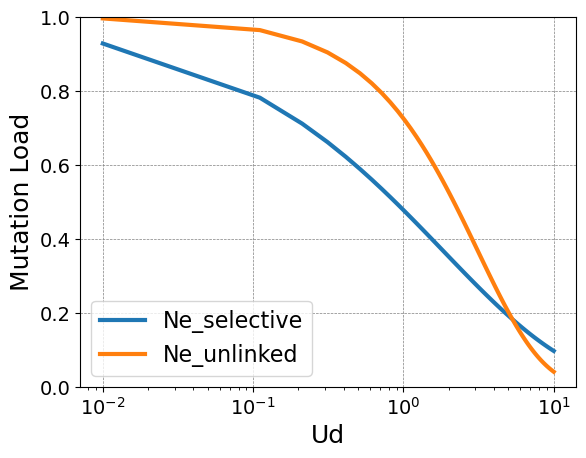

In [35]:
fig = plt.figure()
ax = fig.gca()
ax.plot(Ud, seldeath_Ne, label='Ne_selective')
ax.plot(Ud, unlinked_Ne, label='Ne_unlinked')
ax.set_xscale('log')
ax.set_xlabel('Ud')
ax.set_ylabel('Mutation Load')
ax.set_ylim(0, 1)
plt.legend()
plt.grid()